In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                       #Importing
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\PRATHAM\OneDrive\Desktop\All Intern\Tata Data new.csv" , na_values=['-'])     #reading file

In [3]:
df.head()

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,ER,HV-E,LV-E,LV - HV,BDV,ERF,Parameter Availability Index,Worst Parameter,Total Weightage,Total Score,Risk Index
0,16.0,66.94,24.25,37.74,68.33,1,1,33.33,254,248,265,40.0,33.33,4,AGE,300,210,70.00%
1,23.0,76.87,38.72,9.00,68.33,0.5,0.6,33.33,"1,000","2,147","2,147",52.0,33.33,4,AGE,300,210,70.00%
2,23.0,41.99,32.10,0.00,56.67,1,1,33.33,500,500,100,30.0,46.67,4,AGE,300,185,61.67%
3,6.0,65.43,13.25,10.03,56.67,0.9,1,33.33,499,498,499,34.0,33.33,4,PQF,300,150,50.00%
4,37.0,35.08,66.22,49.71,80.00,1,1,33.33,500,500,500,34.0,33.33,4,AGE,300,210,70.00%


In [4]:
df.tail()

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,ER,HV-E,LV-E,LV - HV,BDV,ERF,Parameter Availability Index,Worst Parameter,Total Weightage,Total Score,Risk Index
4792,11.0,53.04,12.85,11.71,76.67,0.92,0.91,33.33,400,300,400,51.75,33.33,4,PQF,300,205,68.33%
4793,11.0,0.00,0.00,0.00,33.33,0.9,0.7,33.33,500,300,500,41.35,33.33,4,AGE,300,130,43.33%
4794,5.0,79.43,28.28,7.16,56.67,0.88,0.67,33.33,300,200,300,54.00,33.33,4,PQF,300,150,50.00%
4795,4.0,72.16,14.24,10.89,56.67,0.65,0.72,33.33,900,600,900,55.53,33.33,4,PQF,300,150,50.00%
4796,40.0,66.46,12.39,8.90,45.00,0.77,0.82,33.33,150,100,150,49.13,33.33,4,AGE,300,185,61.67%


In [5]:
df.shape

(4797, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Actual Age                    4766 non-null   float64
 1   % Loading                     3836 non-null   float64
 2   % Unbalance                   3836 non-null   float64
 3   THDI R                        3836 non-null   float64
 4   PQF                           3836 non-null   float64
 5   Body                          3982 non-null   object 
 6   Neutral                       3979 non-null   object 
 7   ER                            3982 non-null   float64
 8   HV-E                          4038 non-null   object 
 9   LV-E                          4038 non-null   object 
 10  LV - HV                       4042 non-null   object 
 11  BDV                           3962 non-null   float64
 12  ERF                           4055 non-null   float64
 13  Par

In [7]:
df.isnull().sum()   #Total null values

Actual Age                       31
% Loading                       961
% Unbalance                     961
THDI R                          961
PQF                             961
Body                            815
Neutral                         818
ER                              815
HV-E                            759
LV-E                            759
LV - HV                         755
BDV                             835
ERF                             742
Parameter Availability Index      0
Worst Parameter                   6
Total Weightage                   0
Total Score                       0
Risk Index                        6
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100  #percentage of null values

Actual Age                       0.646237
% Loading                       20.033354
% Unbalance                     20.033354
THDI R                          20.033354
PQF                             20.033354
Body                            16.989785
Neutral                         17.052324
ER                              16.989785
HV-E                            15.822389
LV-E                            15.822389
LV - HV                         15.739004
BDV                             17.406713
ERF                             15.468001
Parameter Availability Index     0.000000
Worst Parameter                  0.125078
Total Weightage                  0.000000
Total Score                      0.000000
Risk Index                       0.125078
dtype: float64

In [9]:
from sklearn.impute import KNNImputer                        #This code fills missing values in the % Loading column using KNN-based
#                                                             imputation by looking at patterns in all numeric columns, not just % Loading.



# KNN Imputer works on multiple features — even one column is fine but usually needs others for context
# For best results, select all numeric columns that may be correlated
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)  # You can change k (3, 5, etc.)

# Fit and transform the data
imputed_array = imputer.fit_transform(numeric_df)

# Convert back to DataFrame
imputed_df = pd.DataFrame(imputed_array, columns=numeric_df.columns)

# Replace the column in original df
df['% Loading'] = imputed_df['% Loading']

In [10]:
import pandas as pd               #it cleans those columns and intelligently fills in their missing values using KNN.
import numpy as np
from sklearn.impute import KNNImputer

# Step 1: Replace blanks or "-" with NaN
df = df.replace(r'^\s*$|-', np.nan, regex=True)

# Step 2: Define columns to impute
cols_to_impute = [
     '% Unbalance', 'THDI R', 'PQF',
    'Body', 'Neutral', 'ER', 'HV-E', 'LV-E',
    'LV - HV', 'BDV', 'ERF'
]

# Step 3: Ensure all these columns are numeric
df[cols_to_impute] = df[cols_to_impute].apply(pd.to_numeric, errors='coerce')

# Step 4: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
imputed_array = imputer.fit_transform(df[cols_to_impute])

# Step 5: Replace original columns with imputed values
df[cols_to_impute] = pd.DataFrame(imputed_array, columns=cols_to_impute)

In [11]:
df.head(15)

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,ER,HV-E,LV-E,LV - HV,BDV,ERF,Parameter Availability Index,Worst Parameter,Total Weightage,Total Score,Risk Index
0,16.0,66.94,24.25,37.74,68.33,1.0,1.0,33.33,254.0,248.000000,265.000000,40.0,33.33,4,AGE,300,210,70.00%
1,23.0,76.87,38.72,9.00,68.33,0.5,0.6,33.33,500.0,233.333333,500.000000,52.0,33.33,4,AGE,300,210,70.00%
2,23.0,41.99,32.10,0.00,56.67,1.0,1.0,33.33,500.0,500.000000,100.000000,30.0,46.67,4,AGE,300,185,61.67%
3,6.0,65.43,13.25,10.03,56.67,0.9,1.0,33.33,499.0,498.000000,499.000000,34.0,33.33,4,PQF,300,150,50.00%
4,37.0,35.08,66.22,49.71,80.00,1.0,1.0,33.33,500.0,500.000000,500.000000,34.0,33.33,4,AGE,300,210,70.00%
5,35.0,43.07,18.30,17.17,68.33,1.0,0.5,33.33,100.0,100.000000,50.000000,40.0,33.33,4,AGE,300,185,61.67%
6,35.0,39.25,25.41,11.34,68.33,1.0,1.0,33.33,498.0,499.000000,498.000000,34.0,33.33,4,AGE,300,185,61.67%
7,13.0,81.16,12.54,10.45,56.67,0.5,0.6,33.33,500.0,500.000000,200.000000,36.0,33.33,4,LOADING,300,205,68.33%
8,28.0,75.36,38.57,14.02,80.00,0.8,0.5,33.33,230.0,300.000000,233.333333,42.0,33.33,4,AGE,300,235,78.33%
9,24.0,70.80,10.00,9.29,65.00,1.0,1.0,33.33,500.0,500.000000,500.000000,34.0,33.33,4,AGE,300,210,70.00%


In [12]:
df['Risk Index'] = df['Risk Index'].replace('%', ' ')       # replacing percentage with space

In [13]:
# We do the same as above, but then divide by 100 to get the true decimal value
df['Risk Index Decimal'] = df['Risk Index'].str.rstrip('%').astype(float) / 100.0

In [14]:
df.head()

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,ER,HV-E,LV-E,LV - HV,BDV,ERF,Parameter Availability Index,Worst Parameter,Total Weightage,Total Score,Risk Index,Risk Index Decimal
0,16.0,66.94,24.25,37.74,68.33,1.0,1.0,33.33,254.0,248.000000,265.0,40.0,33.33,4,AGE,300,210,70.00%,0.7000
1,23.0,76.87,38.72,9.00,68.33,0.5,0.6,33.33,500.0,233.333333,500.0,52.0,33.33,4,AGE,300,210,70.00%,0.7000
2,23.0,41.99,32.10,0.00,56.67,1.0,1.0,33.33,500.0,500.000000,100.0,30.0,46.67,4,AGE,300,185,61.67%,0.6167
3,6.0,65.43,13.25,10.03,56.67,0.9,1.0,33.33,499.0,498.000000,499.0,34.0,33.33,4,PQF,300,150,50.00%,0.5000
4,37.0,35.08,66.22,49.71,80.00,1.0,1.0,33.33,500.0,500.000000,500.0,34.0,33.33,4,AGE,300,210,70.00%,0.7000


In [15]:
df = df.drop(columns=['Risk Index'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Actual Age                    4766 non-null   float64
 1   % Loading                     4797 non-null   float64
 2   % Unbalance                   4797 non-null   float64
 3   THDI R                        4797 non-null   float64
 4   PQF                           4797 non-null   float64
 5   Body                          4797 non-null   float64
 6   Neutral                       4797 non-null   float64
 7   ER                            4797 non-null   float64
 8   HV-E                          4797 non-null   float64
 9   LV-E                          4797 non-null   float64
 10  LV - HV                       4797 non-null   float64
 11  BDV                           4797 non-null   float64
 12  ERF                           4797 non-null   float64
 13  Par

In [17]:
# Step 1: Replace commas and strip any extra spaces 
df['Total Score'] = df['Total Score'].str.replace(',', '').str.strip()           #.strip() gives your string a haircut, trimming the messy ends but 
                                                                                    #leaving the inside untouched.


# Step 2: Convert to float, forcing non-numeric to NaN
df['Total Score'] = pd.to_numeric(df['Total Score'], errors='coerce')

In [18]:
# Check the actual column names
print(df.columns.tolist())


['Actual Age', '% Loading', '% Unbalance', 'THDI R', 'PQF', 'Body', 'Neutral', 'ER', 'HV-E', 'LV-E', 'LV - HV', 'BDV', 'ERF', 'Parameter Availability Index', 'Worst Parameter', 'Total Weightage', 'Total Score', 'Risk Index Decimal']


In [19]:
# Step 1: Replace commas and strip any extra spaces
df['Total Score'] = df['Total Score'].replace(',', '')


# Step 2: Convert to float, forcing non-numeric to NaN
df['Total Score'] = pd.to_numeric(df['Total Score'], errors='coerce')

In [20]:
df.head(15)

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,ER,HV-E,LV-E,LV - HV,BDV,ERF,Parameter Availability Index,Worst Parameter,Total Weightage,Total Score,Risk Index Decimal
0,16.0,66.94,24.25,37.74,68.33,1.0,1.0,33.33,254.0,248.000000,265.000000,40.0,33.33,4,AGE,300,210.0,0.7000
1,23.0,76.87,38.72,9.00,68.33,0.5,0.6,33.33,500.0,233.333333,500.000000,52.0,33.33,4,AGE,300,210.0,0.7000
2,23.0,41.99,32.10,0.00,56.67,1.0,1.0,33.33,500.0,500.000000,100.000000,30.0,46.67,4,AGE,300,185.0,0.6167
3,6.0,65.43,13.25,10.03,56.67,0.9,1.0,33.33,499.0,498.000000,499.000000,34.0,33.33,4,PQF,300,150.0,0.5000
4,37.0,35.08,66.22,49.71,80.00,1.0,1.0,33.33,500.0,500.000000,500.000000,34.0,33.33,4,AGE,300,210.0,0.7000
5,35.0,43.07,18.30,17.17,68.33,1.0,0.5,33.33,100.0,100.000000,50.000000,40.0,33.33,4,AGE,300,185.0,0.6167
6,35.0,39.25,25.41,11.34,68.33,1.0,1.0,33.33,498.0,499.000000,498.000000,34.0,33.33,4,AGE,300,185.0,0.6167
7,13.0,81.16,12.54,10.45,56.67,0.5,0.6,33.33,500.0,500.000000,200.000000,36.0,33.33,4,LOADING,300,205.0,0.6833
8,28.0,75.36,38.57,14.02,80.00,0.8,0.5,33.33,230.0,300.000000,233.333333,42.0,33.33,4,AGE,300,235.0,0.7833
9,24.0,70.80,10.00,9.29,65.00,1.0,1.0,33.33,500.0,500.000000,500.000000,34.0,33.33,4,AGE,300,210.0,0.7000


In [21]:
df.isnull().sum()

Actual Age                      31
% Loading                        0
% Unbalance                      0
THDI R                           0
PQF                              0
Body                             0
Neutral                          0
ER                               0
HV-E                             0
LV-E                             0
LV - HV                          0
BDV                              0
ERF                              0
Parameter Availability Index     0
Worst Parameter                  6
Total Weightage                  0
Total Score                      1
Risk Index Decimal               6
dtype: int64

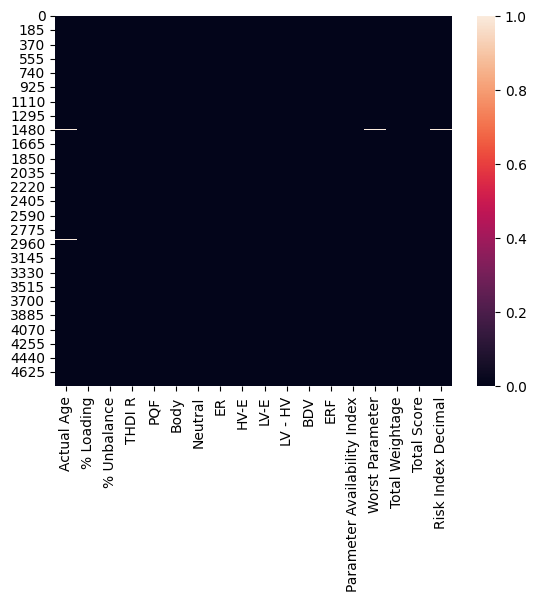

In [22]:
sns.heatmap(df.isnull())
plt.show()                   # seeing total null values using heatmaps
                             #Instead of manually scanning for missing values, you get a quick visual overview of which columns and rows have NaN values,
                           #  and whether there’s a pattern in the missing data.

In [23]:
df.dropna(inplace=True)   #droping all na values

In [24]:
df.isnull().sum()

Actual Age                      0
% Loading                       0
% Unbalance                     0
THDI R                          0
PQF                             0
Body                            0
Neutral                         0
ER                              0
HV-E                            0
LV-E                            0
LV - HV                         0
BDV                             0
ERF                             0
Parameter Availability Index    0
Worst Parameter                 0
Total Weightage                 0
Total Score                     0
Risk Index Decimal              0
dtype: int64

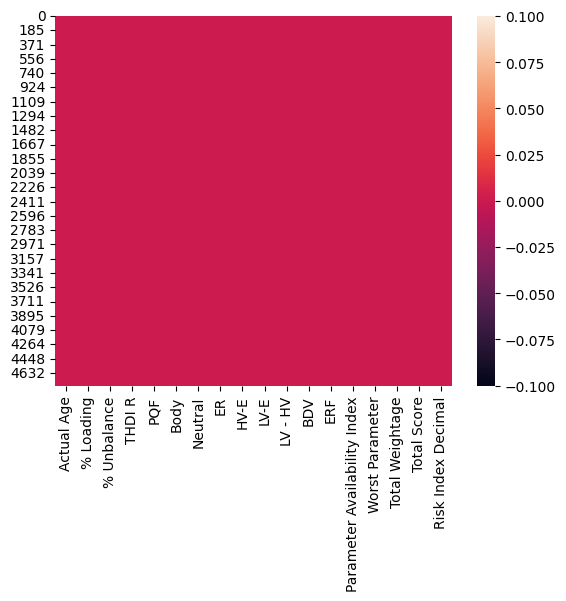

In [25]:
sns.heatmap(df.isnull())           #no null values are there in the following heatmap
plt.show()

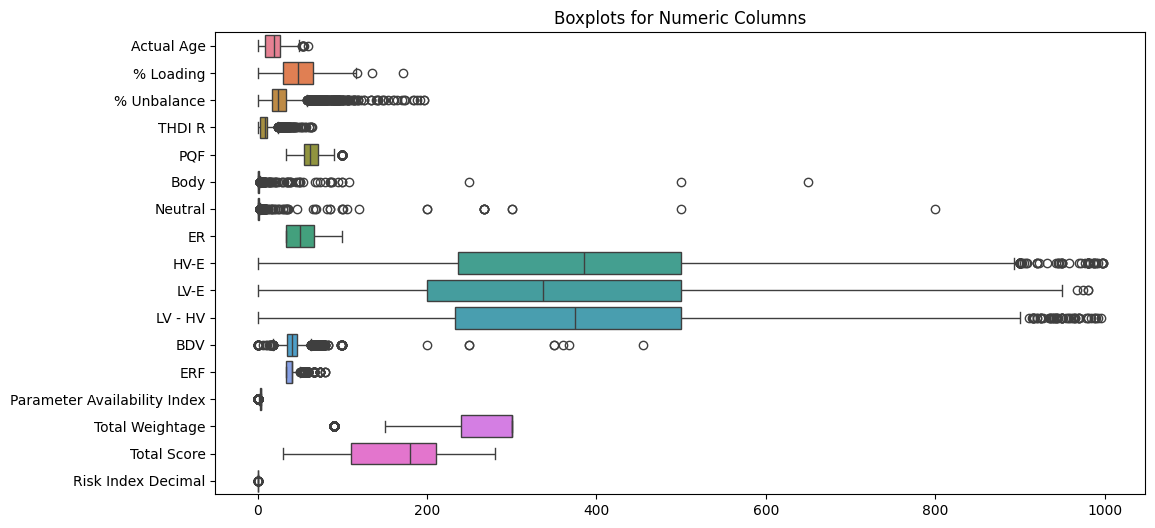

In [26]:
import pandas as pd
import seaborn as sns       #That code is used to quickly visualize the distribution and detect outliers for all numeric columns in your dataset
import matplotlib.pyplot as plt

# Select only numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot all numeric columns side-by-side
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient='h')  # 'h' for horizontal
plt.title("Boxplots for Numeric Columns")
plt.show()

In [27]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])                        #interquantile range for removing outliers 
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw    

In [28]:
df.columns

Index(['Actual Age', '% Loading', '% Unbalance', 'THDI R', 'PQF', 'Body',
       'Neutral', 'ER', 'HV-E', 'LV-E', 'LV - HV', 'BDV', 'ERF',
       'Parameter Availability Index', 'Worst Parameter', 'Total Weightage',
       'Total Score', 'Risk Index Decimal'],
      dtype='object')

In [29]:
wisker(df['Actual Age'])  

(np.float64(-16.5), np.float64(51.5))

In [31]:
for i in ['Actual Age', '% Loading', '% Unbalance', 'THDI R', 'PQF', 'Body',
          'Neutral', 'ER', 'HV-E', 'LV-E', 'LV - HV', 'BDV', 'ERF']:
    
    lw, uw = wisker(df[i])  # Get lower & upper whisker from your function
    
    # Cap lower values
    df[i] = np.where(df[i] < lw, lw, df[i])
    
    # Cap upper values
    df[i] = np.where(df[i] > uw, uw, df[i])


In [32]:
# List of columns you want to cap
columns = ['Actual Age', '% Loading', '% Unbalance', 'THDI R', 'PQF', 'Body',
           'Neutral', 'ER', 'HV-E', 'LV-E', 'LV - HV', 'BDV', 'ERF']

# Apply capping using whisker bounds
for i in columns:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

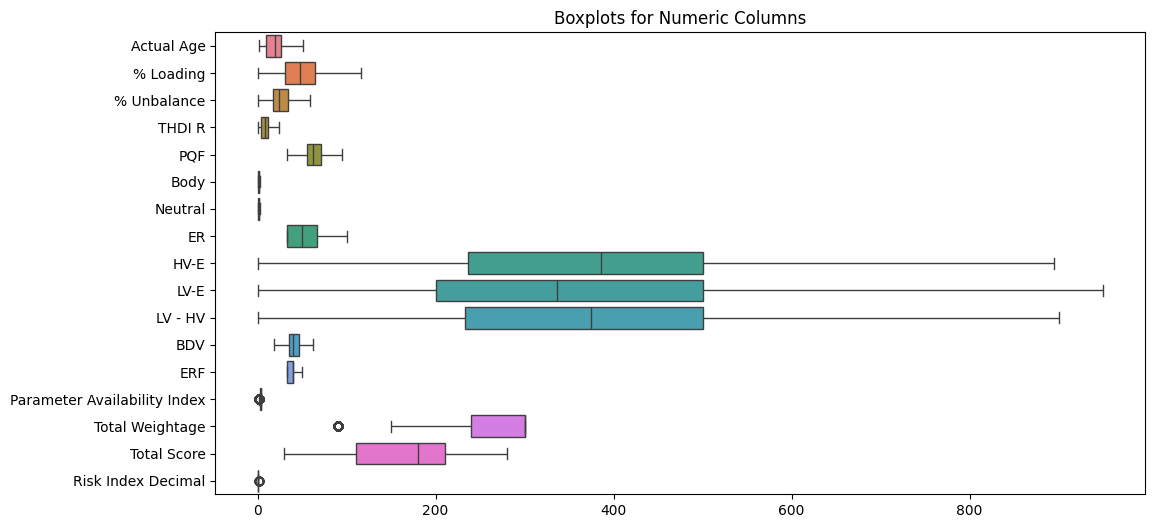

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot all numeric columns side-by-side
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient='h')  # 'h' for horizontal
plt.title("Boxplots for Numeric Columns")
plt.show()

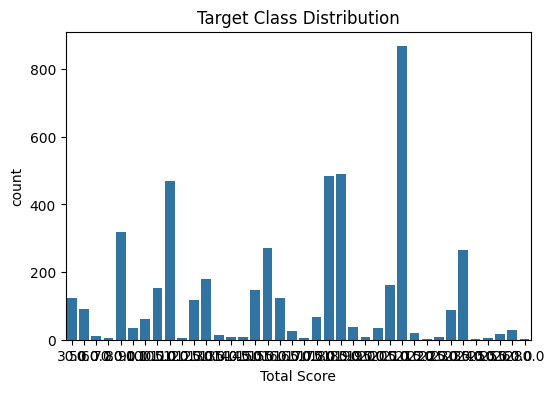

Class counts:
Total Score
210.0    867
185.0    489
180.0    485
110.0    468
80.0     319
155.0    270
235.0    265
130.0    180
205.0    163
105.0    153
150.0    147
30.0     123
160.0    123
125.0    118
50.0      92
230.0     89
175.0     66
100.0     62
190.0     39
200.0     35
90.0      35
260.0     29
165.0     27
215.0     20
255.0     18
135.0     15
60.0      12
145.0      9
195.0      8
140.0      7
225.0      7
170.0      6
70.0       5
250.0      4
120.0      4
240.0      2
220.0      2
280.0      2
Name: count, dtype: int64

Class percentages:
Total Score
210.0    18.195173
185.0    10.262329
180.0    10.178384
110.0     9.821616
80.0      6.694648
155.0     5.666317
235.0     5.561385
130.0     3.777545
205.0     3.420776
105.0     3.210913
150.0     3.084995
30.0      2.581322
160.0     2.581322
125.0     2.476390
50.0      1.930745
230.0     1.867786
175.0     1.385100
100.0     1.301154
190.0     0.818468
200.0     0.734523
90.0      0.734523
260.0     0.608604
165.

In [34]:
# Set target column
target_col = "Total Score"

# --- 1. Target Class Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.show()
#A bar chart showing how many rows have each "Total Score" value
print("Class counts:")
print(df[target_col].value_counts())
print("\nClass percentages:")
print(df[target_col].value_counts(normalize=True) * 100)

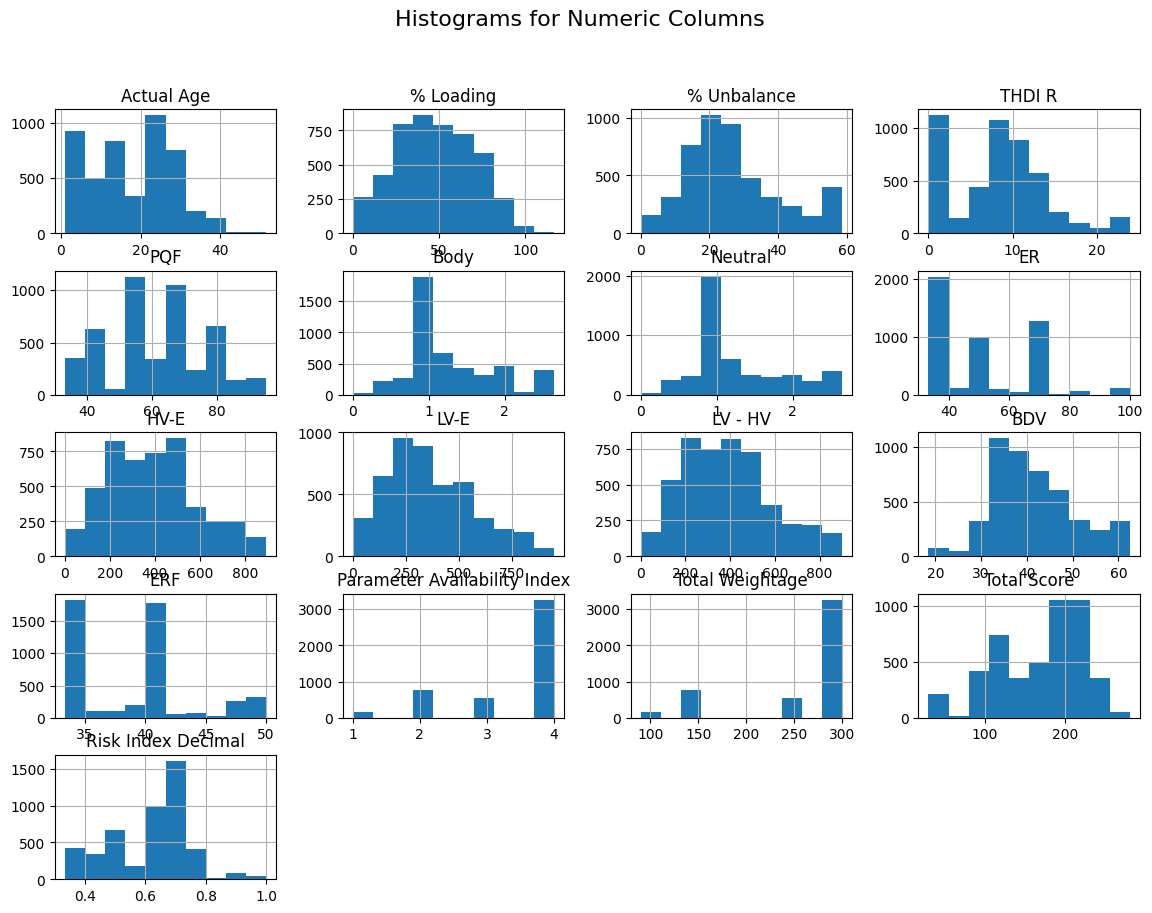

In [35]:
df.hist(figsize=(14, 10))
plt.suptitle("Histograms for Numeric Columns", fontsize=16)
plt.show()


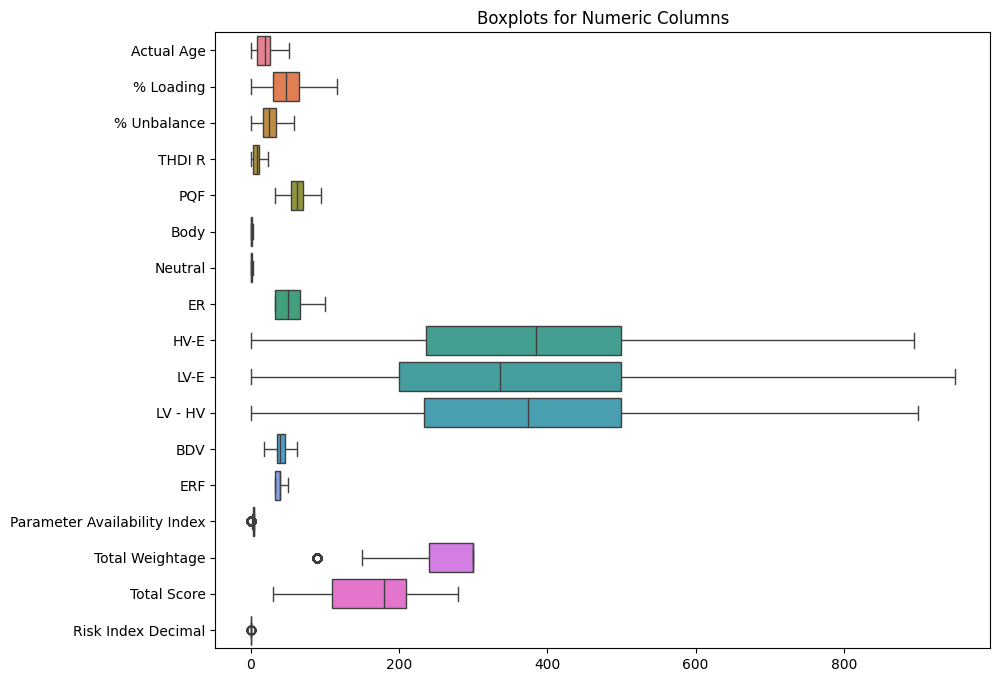

In [36]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplots for Numeric Columns")
plt.show()

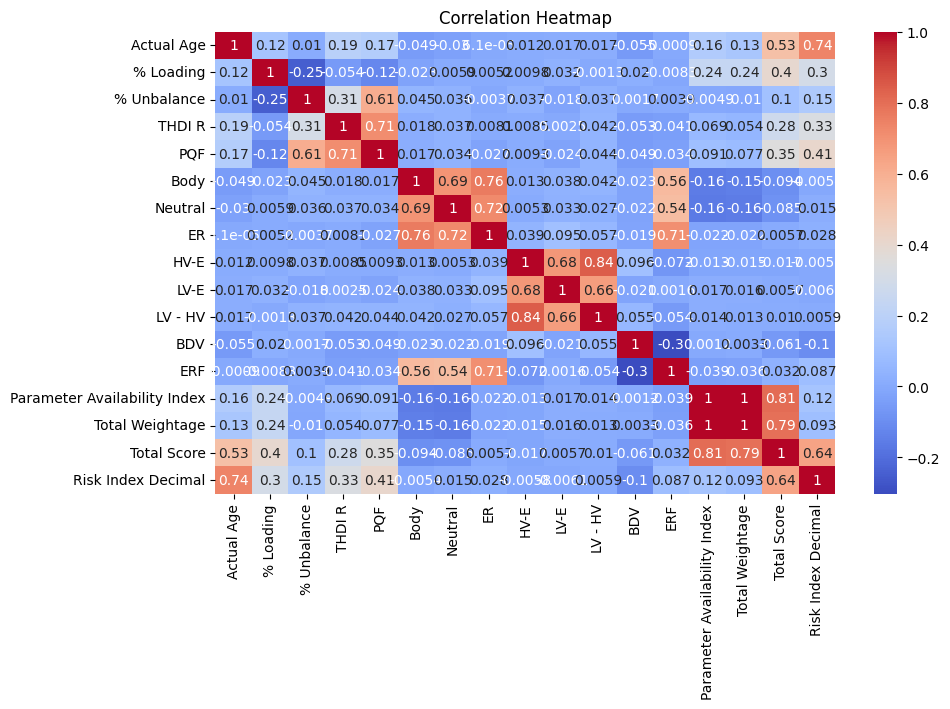

In [37]:
plt.figure(figsize=(10, 6))          #corr heatmap to show corrr  realtion between all numeric columns heatmap
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

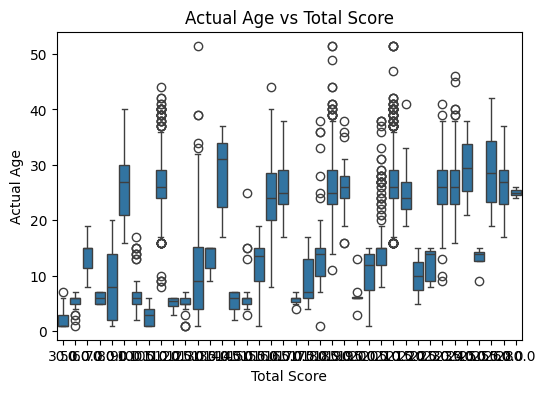

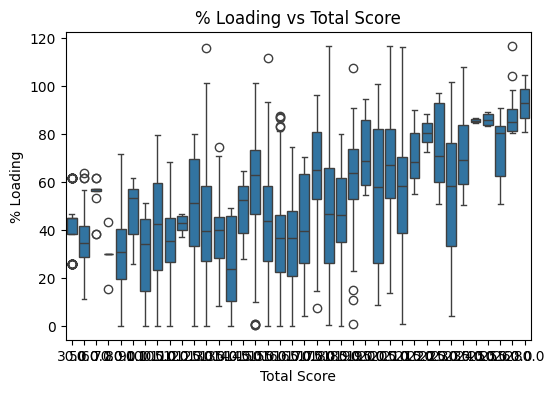

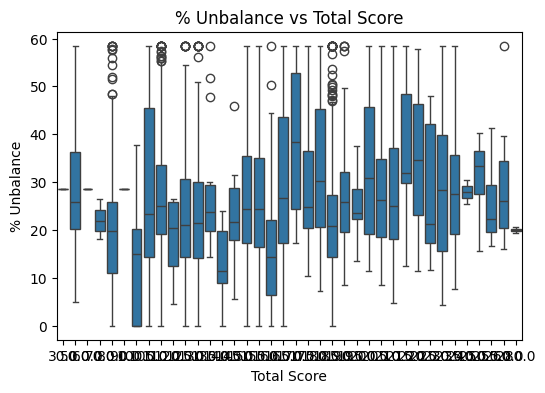

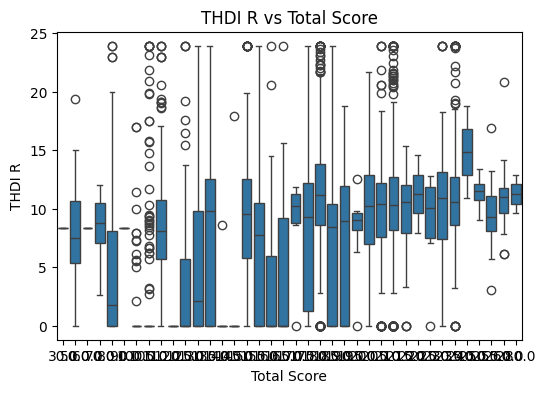

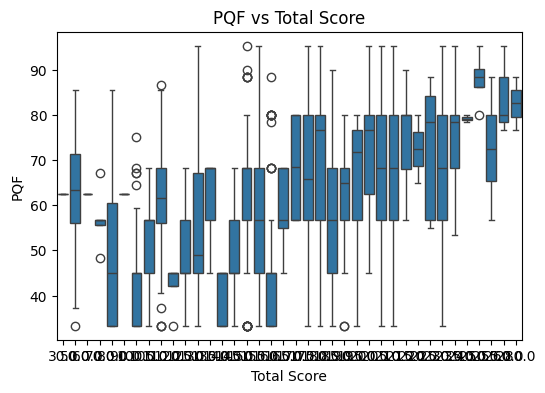

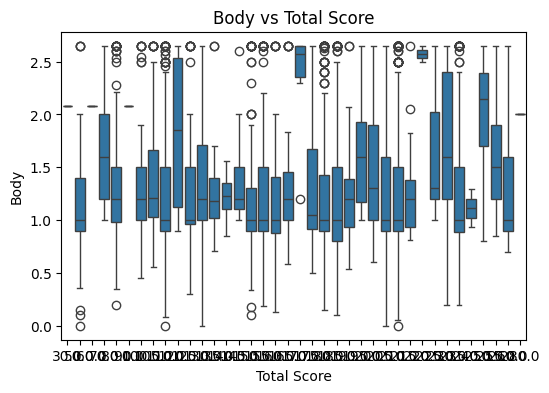

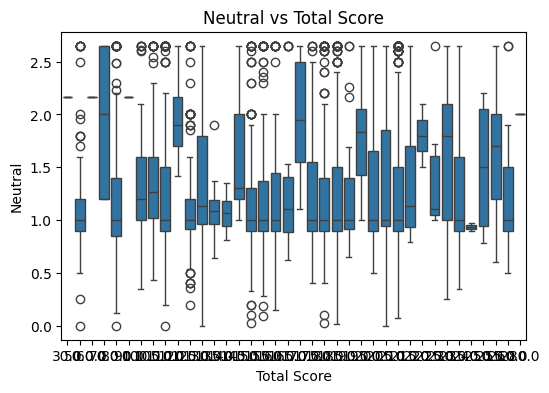

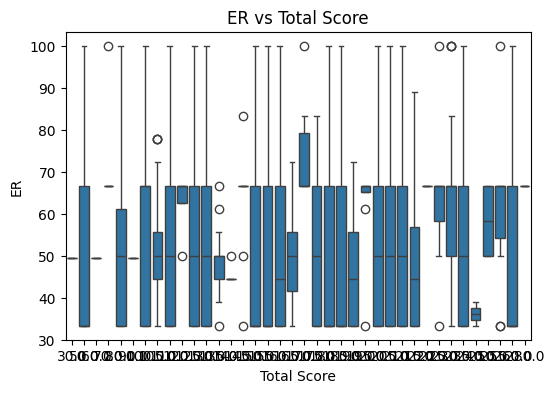

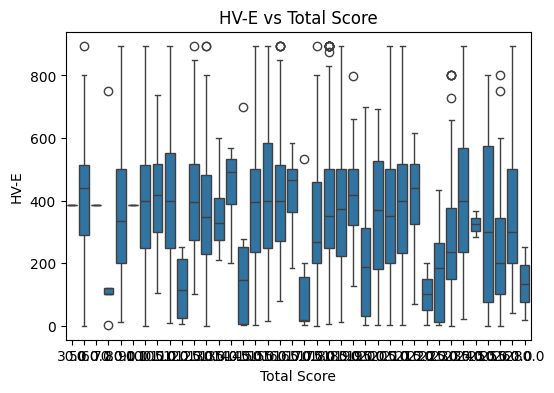

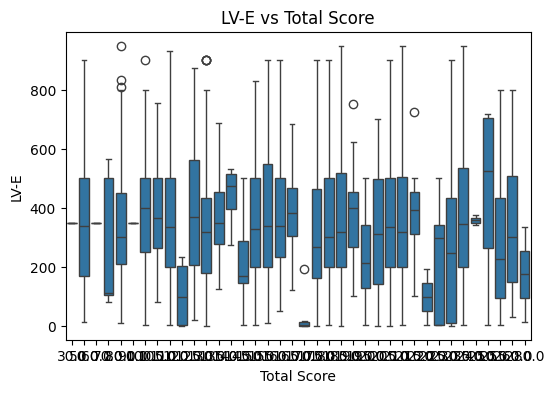

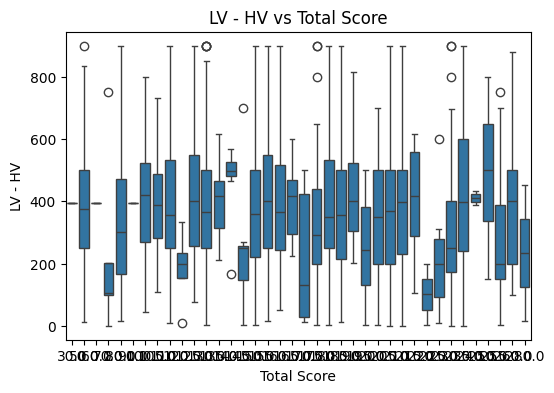

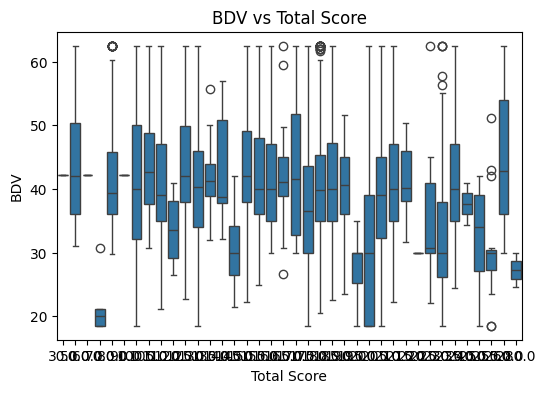

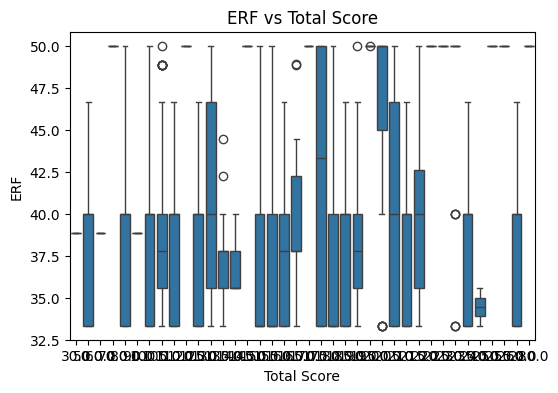

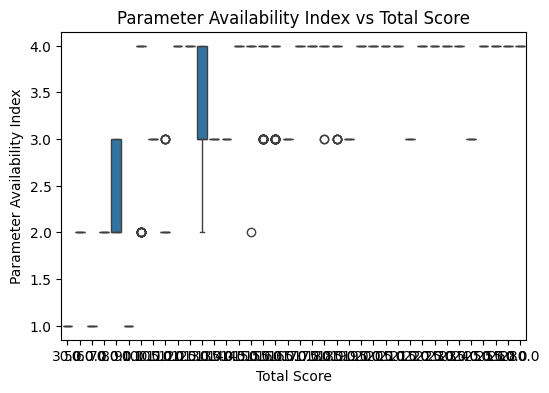

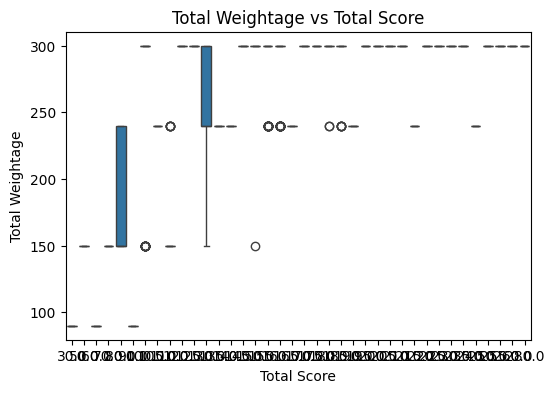

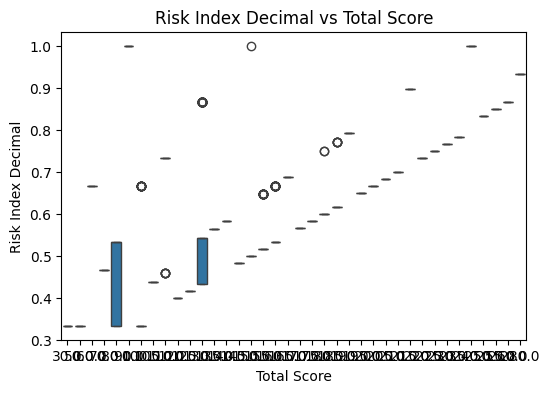

In [38]:
# --- 5. Relationship between each numeric feature and target ---
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f"{col} vs {target_col}")
        plt.show()

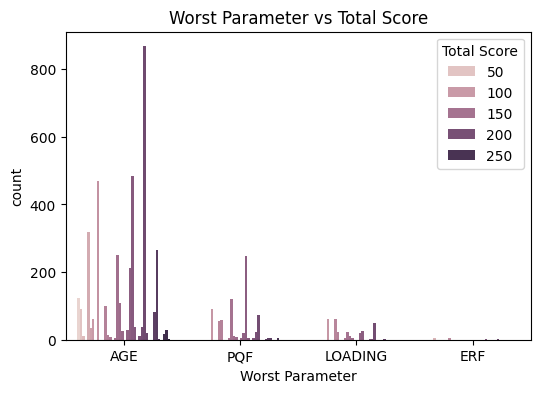

In [39]:

# --- 6. Relationship between categorical features and target ---
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))               
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f"{col} vs {target_col}")
    plt.show()

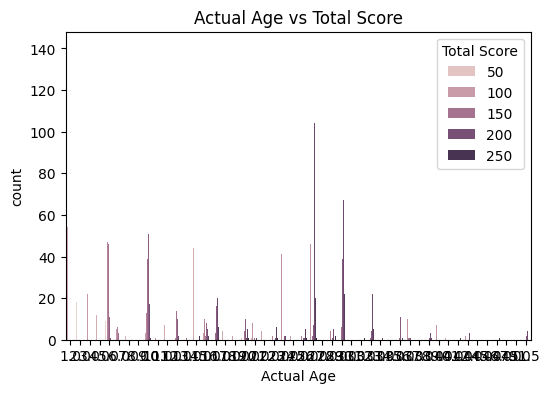

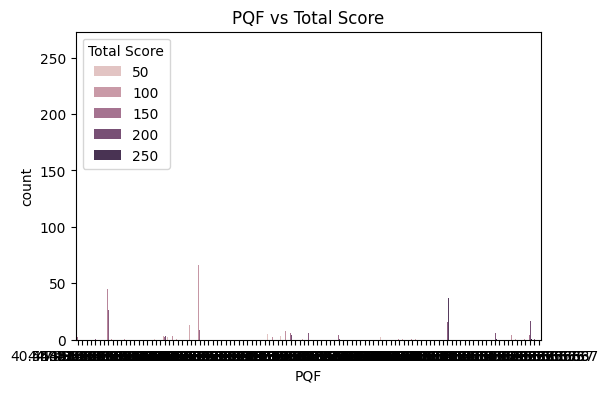

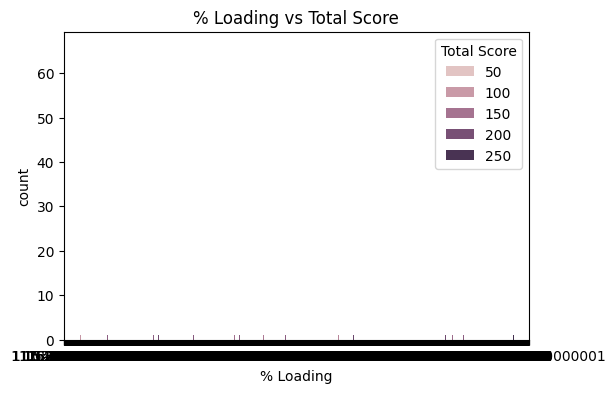

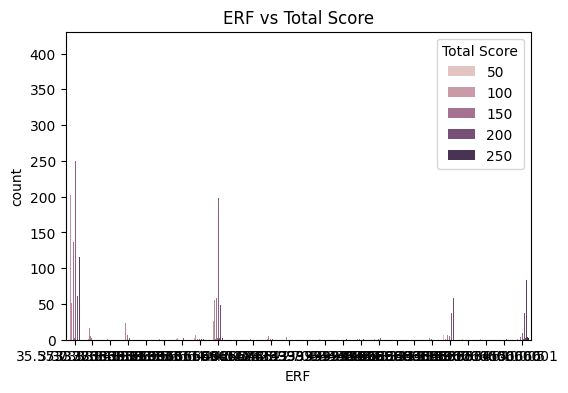

In [40]:
# Explicitly define categorical columns
categorical_cols = ['Actual Age', 'PQF', '% Loading', 'ERF']
target_col = 'Total Score'  # your target column name

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f"{col} vs {target_col}")
    plt.show()


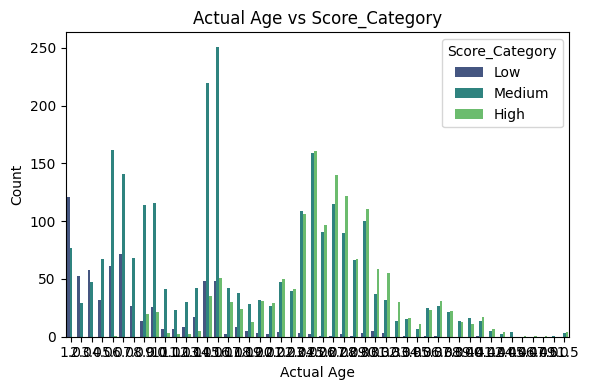

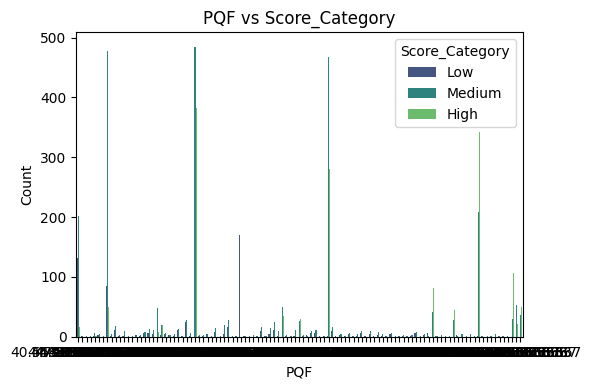

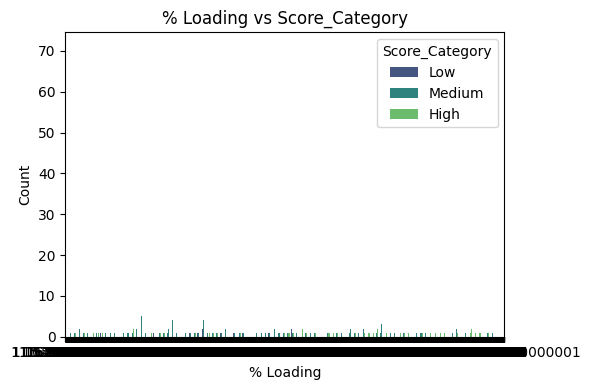

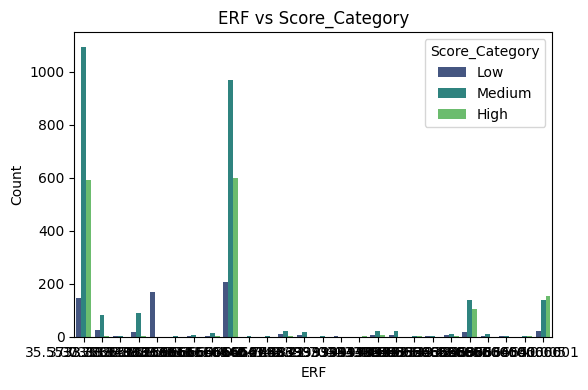

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Bin Total Score into categories ---
bins = [0, 100, 200, 300]  # adjust based on your data range           # Diving our target columns into labels for classsification 
labels = ['Low', 'Medium', 'High']
df['Score_Category'] = pd.cut(df['Total Score'], bins=bins, labels=labels)

# --- 2. Define categorical features manually ---
categorical_cols = ['Actual Age', 'PQF', '% Loading', 'ERF']
target_col = 'Score_Category'

# --- 3. Plot each categorical feature ---
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=df, palette='viridis')
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title=target_col)
    plt.tight_layout()
    plt.show()


In [42]:
skewed_cols = df[numeric_cols].skew().sort_values(ascending=False)      # Skewness measures the asymmetry of a distribution.
for col in skewed_cols.index:          #This code is doing skewness detection and correction to make your numeric 
                                      #features more normally distributed, which can improve model performance.
    if abs(skewed_cols[col]) > 0.5:
        df[col] = np.log1p(df[col])  # log1p handles zero values safely

In [43]:
from sklearn.preprocessing import StandardScaler         #standardising numerical columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [44]:
df.columns

Index(['Actual Age', '% Loading', '% Unbalance', 'THDI R', 'PQF', 'Body',
       'Neutral', 'ER', 'HV-E', 'LV-E', 'LV - HV', 'BDV', 'ERF',
       'Parameter Availability Index', 'Worst Parameter', 'Total Weightage',
       'Total Score', 'Risk Index Decimal', 'Score_Category'],
      dtype='object')

In [45]:
# Example ratio
df['score_per_risk'] = df['Total Score'] / (df['Risk Index Decimal'] + 1)

# Example interaction
df['score_risk_product'] = df['Total Score'] * df['Risk Index Decimal']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4765 entries, 0 to 4796
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Actual Age                    4765 non-null   float64 
 1   % Loading                     4765 non-null   float64 
 2   % Unbalance                   4765 non-null   float64 
 3   THDI R                        4765 non-null   float64 
 4   PQF                           4765 non-null   float64 
 5   Body                          4765 non-null   float64 
 6   Neutral                       4765 non-null   float64 
 7   ER                            4765 non-null   float64 
 8   HV-E                          4765 non-null   float64 
 9   LV-E                          4765 non-null   float64 
 10  LV - HV                       4765 non-null   float64 
 11  BDV                           4765 non-null   float64 
 12  ERF                           4765 non-null   float64

In [47]:
low_corr_features = df.corr()['Total Score '].abs().sort_values()
low_corr_features = low_corr_features[low_corr_features < 0.05].index
df.drop(columns=low_corr_features, inplace=True)

ValueError: could not convert string to float: 'AGE'

In [48]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number']) 

# Find low-correlation features with respect to "Total Score"
low_corr_features = numeric_df.corr()['Total Score'].abs().sort_values() 
low_corr_features = low_corr_features[low_corr_features < 0.05].index

# Drop them from the original dataframe
df.drop(columns=low_corr_features, inplace=True) 

print(f"Dropped features: {list(low_corr_features)}")


Dropped features: ['ERF', 'HV-E', 'ER', 'LV - HV']


In [49]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Check correlation with target variable
low_corr_features = numeric_df.corr()['Total Score'].abs().sort_values()

# Drop features with low correlation (e.g., < 0.05)
low_corr_features = low_corr_features[low_corr_features < 0.05].index
df.drop(columns=low_corr_features, inplace=True)

In [50]:
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
df.drop(columns=to_drop, inplace=True)


ValueError: could not convert string to float: 'AGE'

In [51]:
# Keep only numeric columns                                                                   #Dropping highly correlated features
wnumeric_df = df.select_dtypes(include=['number'])
 
# Compute correlation matrix on numeric columns
corr_matrix = numeric_df.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

# Drop them from the original dataframe
df.drop(columns=to_drop, inplace=True)

print(f"Dropped highly correlated features: {to_drop}")

Dropped highly correlated features: ['Total Weightage']


In [52]:
df.head()

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,LV-E,BDV,Parameter Availability Index,Worst Parameter,Total Score,Risk Index Decimal,Score_Category,score_per_risk,score_risk_product
0,-0.218392,0.843494,0.099845,2.699247,0.406482,-0.426122,-0.406163,-0.103094,-0.061896,0.588582,AGE,0.783900,0.625894,High,0.482135,0.490638
1,0.459642,1.283662,0.742703,0.145922,0.406482,-1.615315,-1.308337,-0.164898,1.132139,0.588582,AGE,0.783900,0.625894,High,0.482135,0.490638
2,0.459642,-0.262466,0.483985,-1.392569,-0.375520,-0.426122,-0.406163,0.608680,-1.362280,0.588582,AGE,0.492185,0.019526,Medium,0.482758,0.009610
3,-1.187012,0.776561,-0.711934,0.321994,-0.375520,-0.638154,-0.406163,0.604608,-0.797815,0.588582,PQF,0.009969,-0.829971,Medium,0.058632,-0.008274
4,1.815711,-0.568766,1.316041,2.699247,1.189155,-0.426122,-0.406163,0.608680,-0.797815,0.588582,AGE,0.783900,0.625894,High,0.482135,0.490638


In [53]:
df.drop(columns=['Worst Parameter'], inplace=True)

In [54]:
df.shape

(4765, 15)

In [55]:
df.columns


Index(['Actual Age', '% Loading', '% Unbalance', 'THDI R', 'PQF', 'Body',
       'Neutral', 'LV-E', 'BDV', 'Parameter Availability Index', 'Total Score',
       'Risk Index Decimal', 'Score_Category', 'score_per_risk',
       'score_risk_product'],
      dtype='object')

In [56]:
X = df.iloc[:,0:9]   # All features
y = df['Score_Category']                  # Target variable


In [57]:
X

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,LV-E,BDV
0,-0.218392,0.843494,0.099845,2.699247,0.406482,-0.426122,-0.406163,-0.103094,-0.061896
1,0.459642,1.283662,0.742703,0.145922,0.406482,-1.615315,-1.308337,-0.164898,1.132139
2,0.459642,-0.262466,0.483985,-1.392569,-0.375520,-0.426122,-0.406163,0.608680,-1.362280
3,-1.187012,0.776561,-0.711934,0.321994,-0.375520,-0.638154,-0.406163,0.604608,-0.797815
4,1.815711,-0.568766,1.316041,2.699247,1.189155,-0.426122,-0.406163,0.608680,-0.797815
...,...,...,...,...,...,...,...,...,...
4792,-0.702702,0.227348,-0.752336,0.609179,0.965822,-0.594869,-0.592319,0.089987,1.110148
4793,-0.702702,-2.123759,-4.481932,-1.392569,-1.940866,-0.638154,-1.063230,0.089987,0.088783
4794,-1.283874,1.397139,0.309972,-0.168614,-0.375520,-0.681897,-1.135215,-0.321108,1.304422
4795,-1.380736,1.074882,-0.616623,0.469005,-0.375520,-1.221331,-1.015943,0.793954,1.432041


In [58]:
from sklearn.model_selection import train_test_split                  #Train test split 

# 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [59]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(3335, 9) (1430, 9)
(3335,) (1430,)


In [60]:
from sklearn.preprocessing import StandardScaler            #code is doing feature scaling using StandardScaler from scikit-learn

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #fit → Calculates the mean and standard deviation from the training data only
X_test_scaled = scaler.transform(X_test)         #transform → Applies the scaling formula to transform each feature.

In [ ]:
from sklearn.linear_model import LogisticRegression  #applying logisctic regreesion model 

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.82      0.75      0.78       441
         Low       0.70      0.44      0.54       194
      Medium       0.76      0.87      0.81       795

    accuracy                           0.77      1430
   macro avg       0.76      0.69      0.71      1430
weighted avg       0.77      0.77      0.77      1430



In [62]:
from sklearn.tree import DecisionTreeClassifier         #Applying Decision Tree model

In [63]:
dtree = DecisionTreeClassifier()

In [64]:
dtree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
predictions = dtree.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       0.92      0.92      0.92       441
         Low       0.88      0.89      0.89       194
      Medium       0.93      0.93      0.93       795

    accuracy                           0.92      1430
   macro avg       0.91      0.91      0.91      1430
weighted avg       0.92      0.92      0.92      1430



In [68]:
print(confusion_matrix(y_test,predictions))

[[406   0  35]
 [  1 173  20]
 [ 33  23 739]]


In [69]:
# 5. Visualize the tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt, feature_names=X_train.columns, class_names=[str(cls) for cls in dt.classes_], filled=True)
plt.show()

NameError: name 'tree' is not defined

<Figure size 1500x800 with 0 Axes>

Accuracy: 0.9244755244755245

Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.93      0.92       441
         Low       0.89      0.90      0.89       194
      Medium       0.94      0.93      0.93       795

    accuracy                           0.92      1430
   macro avg       0.91      0.92      0.92      1430
weighted avg       0.92      0.92      0.92      1430


Confusion Matrix:
 [[409   0  32]
 [  1 174  19]
 [ 34  22 739]]


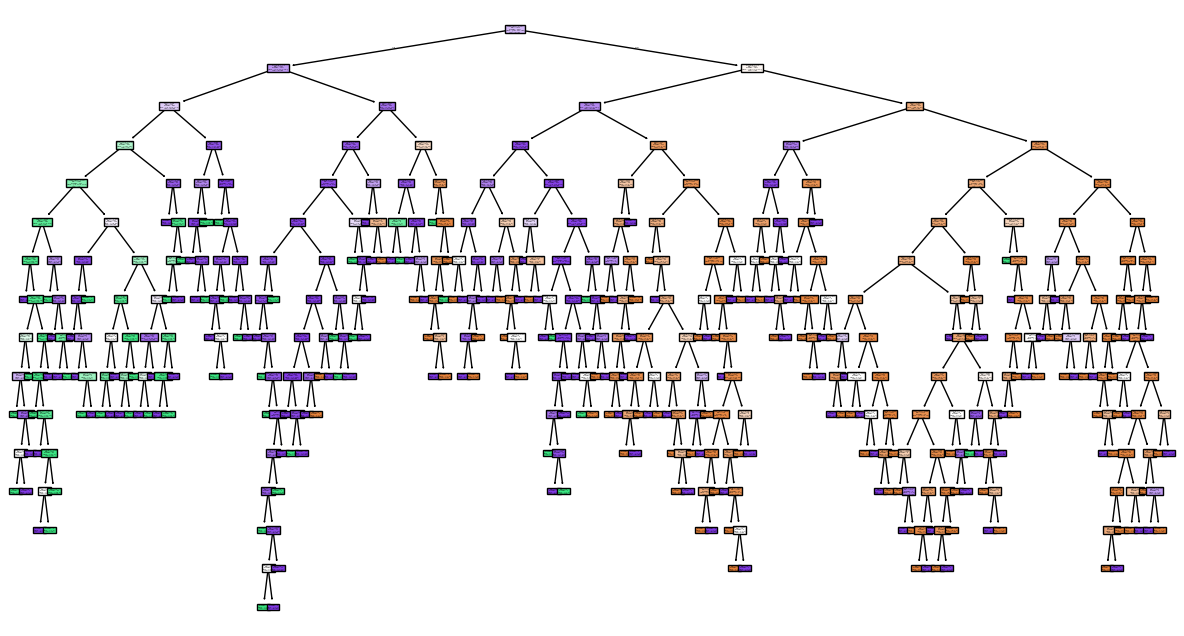

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Create the model
dt = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=None,          # limit depth if overfitting
    random_state=42
)

# 2. Train the model
dt.fit(X_train, y_train)

# 3. Predict
y_pred = dt.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Visualize the tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt, feature_names=X_train.columns, class_names=[str(cls) for cls in dt.classes_], filled=True)
plt.show()

Accuracy: 0.9391608391608391

Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.96      0.94       441
         Low       0.98      0.84      0.91       194
      Medium       0.94      0.95      0.95       795

    accuracy                           0.94      1430
   macro avg       0.95      0.92      0.93      1430
weighted avg       0.94      0.94      0.94      1430


Confusion Matrix:
 [[422   0  19]
 [  1 163  30]
 [ 34   3 758]]


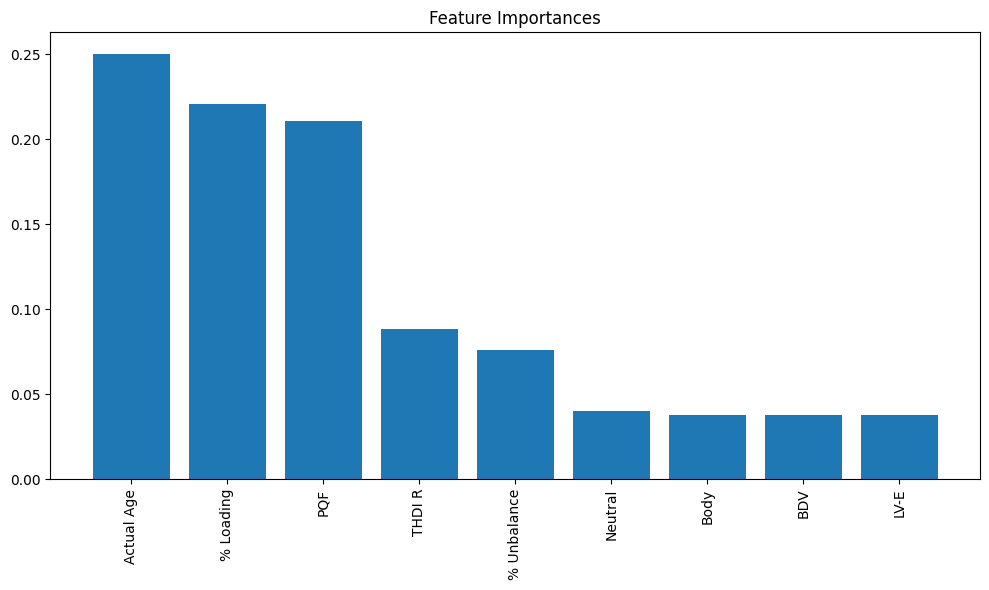

In [71]:
from sklearn.ensemble import RandomForestClassifier           #Applying random forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create the model
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    criterion='gini',      # or 'entropy'
    max_depth=None,        # limit depth if needed
    random_state=42
)

# 2. Train the model
rf.fit(X_train, y_train)

# 3. Predict
y_pred = rf.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Feature importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier                        #Applying KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create the model
# n_neighbors is the number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # p=2 → Euclidean distance

# 2. Train the model
knn.fit(X_train, y_train)

# 3. Predict
y_pred = knn.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8188811188811189

Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.78      0.81       441
         Low       0.70      0.73      0.71       194
      Medium       0.83      0.86      0.85       795

    accuracy                           0.82      1430
   macro avg       0.79      0.79      0.79      1430
weighted avg       0.82      0.82      0.82      1430


Confusion Matrix:
 [[344  11  86]
 [  1 141  52]
 [ 60  49 686]]


In [73]:
from sklearn.model_selection import cross_val_score    #This code is finding the best k value for a K-Nearest Neighbors (KNN) #
                                                        #classifier using cross-validation.
import numpy as np                                            

k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)      #Runs 5-fold cross-validation
    accuracies.append(scores.mean())                             #Takes the average accuracy across folds and stores it for that k.



best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

Best K: 14


In [74]:
from sklearn.neighbors import KNeighborsClassifier                     #Applying KNN with best K value
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the final model with the best k
knn_best = KNeighborsClassifier(n_neighbors=14)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_best.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8307692307692308

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.80      0.83       441
         Low       0.71      0.71      0.71       194
      Medium       0.84      0.88      0.86       795

    accuracy                           0.83      1430
   macro avg       0.81      0.80      0.80      1430
weighted avg       0.83      0.83      0.83      1430


Confusion Matrix:
 [[353  10  78]
 [  1 138  55]
 [ 52  46 697]]


In [75]:
from sklearn.svm import SVC                    #Applying SVM model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

# Step 2: Initialize the SVM classifier
svm = SVC()

# Step 3: Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 5: Train the final SVM model with the best params
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = best_svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.8482517482517482

Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.84      0.85       441
         Low       0.81      0.73      0.77       194
      Medium       0.85      0.88      0.87       795

    accuracy                           0.85      1430
   macro avg       0.84      0.82      0.83      1430
weighted avg       0.85      0.85      0.85      1430


Confusion Matrix:
 [[370   2  69]
 [  0 142  52]
 [ 62  32 701]]


In [76]:
from sklearn.naive_bayes import GaussianNB            #applying naive bayes model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the Naive Bayes model
nb = GaussianNB()

# Step 2: Train the model
nb.fit(X_train, y_train)

# Step 3: Predict
y_pred = nb.predict(X_test)

# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7293706293706294

Classification Report:
               precision    recall  f1-score   support

        High       0.73      0.75      0.74       441
         Low       0.57      0.55      0.56       194
      Medium       0.76      0.76      0.76       795

    accuracy                           0.73      1430
   macro avg       0.69      0.69      0.69      1430
weighted avg       0.73      0.73      0.73      1430


Confusion Matrix:
 [[332   0 109]
 [ 11 106  77]
 [109  81 605]]


In [79]:
import pandas as pd

results = {
    "Model": ["Logistic Regression","DecisionTree" "Random Forest", "KNeighbors","SVC", "GaussianNB" ]
    "Accuracy": [0.77 ,  0.92  , 0.94  , 0.81, 0.84 , 0.73]
    "F1-score": [0.78 , 0.92   ,  0.94  , 0.81, 0.85 ,0.74]
}
results_df = pd.DataFrame(results)
print(results_df)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1753314729.py, line 4)

In [80]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "DecisionTree", "Random Forest", "KNeighbors", "SVC", "GaussianNB"],
    "Accuracy": [0.77, 0.92, 0.94, 0.81, 0.84, 0.73],
    "F1-score": [0.78, 0.92, 0.94, 0.81, 0.85, 0.74]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1-score
0  Logistic Regression      0.77      0.78
1         DecisionTree      0.92      0.92
2        Random Forest      0.94      0.94
3           KNeighbors      0.81      0.81
4                  SVC      0.84      0.85
5           GaussianNB      0.73      0.74


       Feature  Importance
0   Actual Age    0.250491
1    % Loading    0.220727
4          PQF    0.211100
3       THDI R    0.088543
2  % Unbalance    0.075798
6      Neutral    0.040034
5         Body    0.037980
8          BDV    0.037908
7         LV-E    0.037418


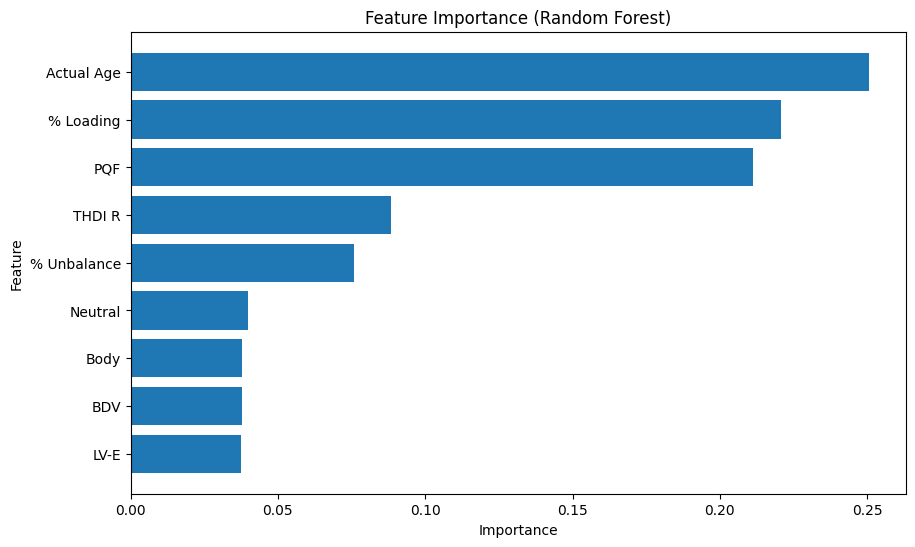

In [83]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # X_train, y_train from your train-test split

# Get feature importance
importances = rf.feature_importances_
feature_names = X_train.columns

# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show table
print(fi_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()


C:\Users\PRATHAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


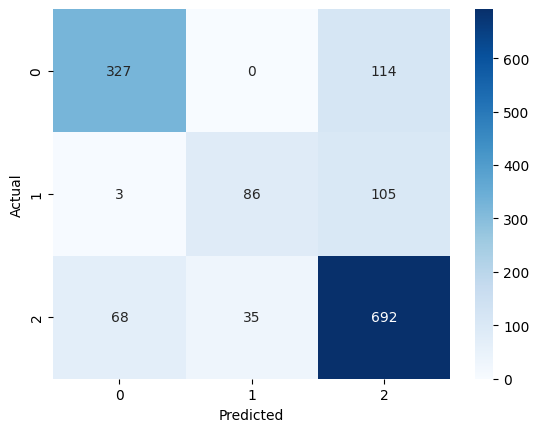

              precision    recall  f1-score   support

        High       0.82      0.74      0.78       441
         Low       0.71      0.44      0.55       194
      Medium       0.76      0.87      0.81       795

    accuracy                           0.77      1430
   macro avg       0.76      0.69      0.71      1430
weighted avg       0.77      0.77      0.77      1430



In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [86]:
from sklearn.model_selection import GridSearchCV            # Applying grid search for best parameters

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy: 0.9304347826086957


In [ ]:
from sklearn.model_selection import GridSearchCV        #appying random forest after hypertuning
from sklearn.ensemble import RandomForestClassifier

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 10, 15],         # depth of each tree
    'min_samples_split': [2, 5, 10],        # min samples to split a node
    'min_samples_leaf': [1, 2, 4],          # min samples at a leaf node
    'max_features': ['sqrt', 'log2']        # features to consider per split
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # or 'f1_macro' for F1-score
    n_jobs=-1,           # use all processors
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import classification_report
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # for saving the model

# Final model with best params
final_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Train on full training set
final_rf.fit(X_train, y_train)

# Predictions
y_pred = final_rf.predict(X_test)

# Evaluation
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the final model
joblib.dump(final_rf, "final_random_forest_model.pkl")
print("✅ Model saved as final_random_forest_model.pkl")


Final Accuracy: 0.9405594405594405

Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.96      0.94       441
         Low       0.98      0.85      0.91       194
      Medium       0.94      0.95      0.95       795

    accuracy                           0.94      1430
   macro avg       0.95      0.92      0.93      1430
weighted avg       0.94      0.94      0.94      1430


Confusion Matrix:
 [[422   0  19]
 [  1 165  28]
 [ 33   4 758]]
✅ Model saved as final_random_forest_model.pkl


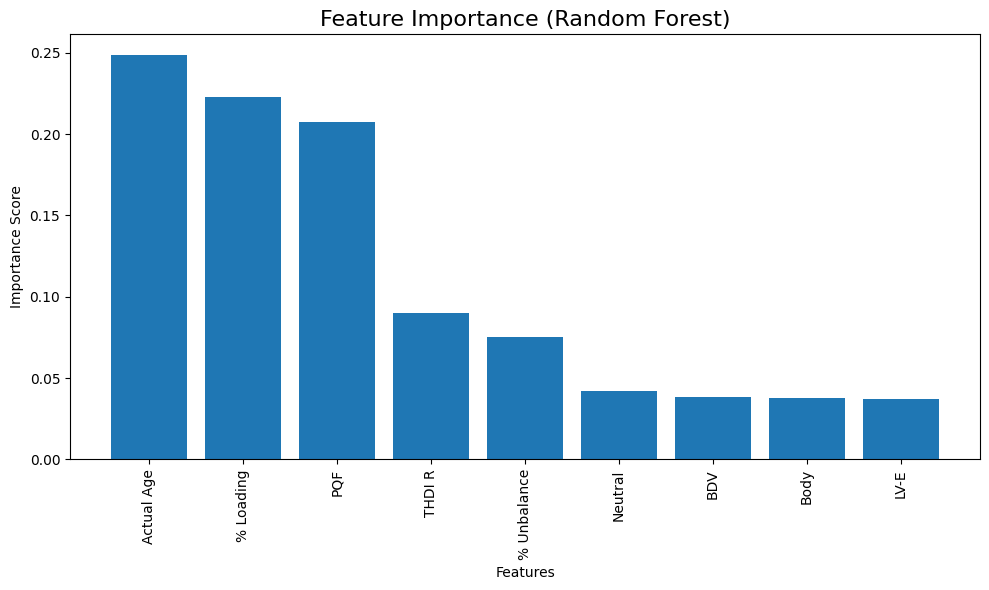

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = final_rf.feature_importances_
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
#Loading Model:# Load model
#loaded_model = joblib.load("random_forest_model.pkl")

# Use loaded model for predictions
#y_pred = loaded_model.predict(X_test)


In [91]:
df.head(20)

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,LV-E,BDV,Parameter Availability Index,Total Score,Risk Index Decimal,Score_Category,score_per_risk,score_risk_product
0,-0.218392,0.843494,0.099845,2.699247,0.406482,-0.426122,-0.406163,-0.103094,-0.061896,0.588582,0.783900,0.625894,High,0.482135,0.490638
1,0.459642,1.283662,0.742703,0.145922,0.406482,-1.615315,-1.308337,-0.164898,1.132139,0.588582,0.783900,0.625894,High,0.482135,0.490638
2,0.459642,-0.262466,0.483985,-1.392569,-0.375520,-0.426122,-0.406163,0.608680,-1.362280,0.588582,0.492185,0.019526,Medium,0.482758,0.009610
3,-1.187012,0.776561,-0.711934,0.321994,-0.375520,-0.638154,-0.406163,0.604608,-0.797815,0.588582,0.009969,-0.829971,Medium,0.058632,-0.008274
4,1.815711,-0.568766,1.316041,2.699247,1.189155,-0.426122,-0.406163,0.608680,-0.797815,0.588582,0.783900,0.625894,High,0.482135,0.490638
5,1.621987,-0.214593,-0.281476,1.542530,0.406482,-0.426122,-1.569268,-1.021715,-0.061896,0.588582,0.492185,0.019526,Medium,0.482758,0.009610
6,1.621987,-0.383922,0.163583,0.545930,0.406482,-0.426122,-0.406163,0.606646,-0.797815,0.588582,0.492185,0.019526,Medium,0.482758,0.009610
7,-0.508978,1.473825,-0.784458,0.393790,-0.375520,-1.615315,-1.308337,0.608680,-0.539353,0.588582,0.728426,0.504329,High,0.484220,0.367366
8,0.943953,1.216728,0.737334,1.004058,1.189155,-0.861652,-1.569268,0.089987,0.159627,0.588582,1.042912,1.232261,High,0.467200,1.285140
9,0.556504,1.014597,-1.079265,0.195496,0.183149,-0.426122,-0.406163,0.608680,-0.797815,0.588582,0.783900,0.625894,High,0.482135,0.490638


In [ ]:
After evaluating multiple models, the Random Forest Classifier achieved the highest accuracy of 94.05% with parameters max_depth=None, min_samples_split=2, n_estimators=300, 
making it the final selected model.”

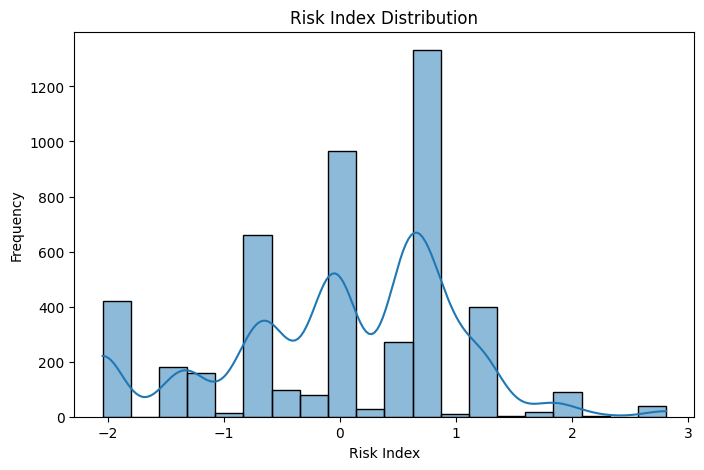

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Risk Index Decimal'], bins=20, kde=True)  # kde=True adds a smooth curve
plt.title("Risk Index Distribution")
plt.xlabel("Risk Index")
plt.ylabel("Frequency")
plt.show()


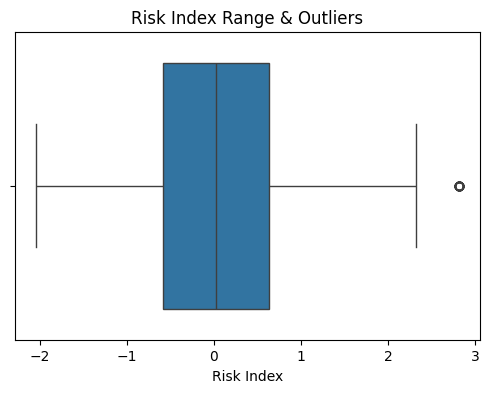

In [95]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Risk Index Decimal'])
plt.title("Risk Index Range & Outliers")
plt.xlabel("Risk Index")
plt.show()


In [96]:
import pandas as pd

# Define bins and labels
bins = [-float('inf'), -0.8, 0.6, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create new category column
df['Risk_Category'] = pd.cut(df['Risk Index Decimal'], bins=bins, labels=labels)

# Check the result
print(df[['Risk Index Decimal', 'Risk_Category']].head())


   Risk Index Decimal Risk_Category
0            0.625894          High
1            0.625894          High
2            0.019526        Medium
3           -0.829971           Low
4            0.625894          High


In [97]:
df.head()

,Actual Age,% Loading,% Unbalance,THDI R,PQF,Body,Neutral,LV-E,BDV,Parameter Availability Index,Total Score,Risk Index Decimal,Score_Category,score_per_risk,score_risk_product,Risk_Category
0,-0.218392,0.843494,0.099845,2.699247,0.406482,-0.426122,-0.406163,-0.103094,-0.061896,0.588582,0.783900,0.625894,High,0.482135,0.490638,High
1,0.459642,1.283662,0.742703,0.145922,0.406482,-1.615315,-1.308337,-0.164898,1.132139,0.588582,0.783900,0.625894,High,0.482135,0.490638,High
2,0.459642,-0.262466,0.483985,-1.392569,-0.375520,-0.426122,-0.406163,0.608680,-1.362280,0.588582,0.492185,0.019526,Medium,0.482758,0.009610,Medium
3,-1.187012,0.776561,-0.711934,0.321994,-0.375520,-0.638154,-0.406163,0.604608,-0.797815,0.588582,0.009969,-0.829971,Medium,0.058632,-0.008274,Low
4,1.815711,-0.568766,1.316041,2.699247,1.189155,-0.426122,-0.406163,0.608680,-0.797815,0.588582,0.783900,0.625894,High,0.482135,0.490638,High


Taking Risk_Category as new target column

In [99]:
X = df.iloc[:,0:9]   # All features
y = df['Risk_Category'] 

In [100]:
from sklearn.model_selection import train_test_split                  #Train test split 

# 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [101]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3335, 9) (1430, 9)
(3335,) (1430,)


In [102]:
from sklearn.preprocessing import StandardScaler            #code is doing feature scaling using StandardScaler from scikit-learn

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #fit → Calculates the mean and standard deviation from the training data only
X_test_scaled = scaler.transform(X_test)         #transform → Applies the scaling formula to transform each feature.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.80      0.84      0.82       567
         Low       0.88      0.83      0.85       276
      Medium       0.76      0.74      0.75       587

    accuracy                           0.80      1430
   macro avg       0.81      0.80      0.81      1430
weighted avg       0.80      0.80      0.80      1430



In [104]:
from sklearn.tree import DecisionTreeClassifier         #Applying Decision Tree model

In [105]:
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [107]:
predictions = dtree.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       0.95      0.96      0.95       567
         Low       0.96      0.93      0.95       276
      Medium       0.93      0.93      0.93       587

    accuracy                           0.94      1430
   macro avg       0.95      0.94      0.94      1430
weighted avg       0.94      0.94      0.94      1430



Accuracy: 0.9468531468531468

Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.96      0.96       567
         Low       0.96      0.94      0.95       276
      Medium       0.94      0.94      0.94       587

    accuracy                           0.95      1430
   macro avg       0.95      0.95      0.95      1430
weighted avg       0.95      0.95      0.95      1430


Confusion Matrix:
 [[545   1  21]
 [  0 260  16]
 [ 29   9 549]]


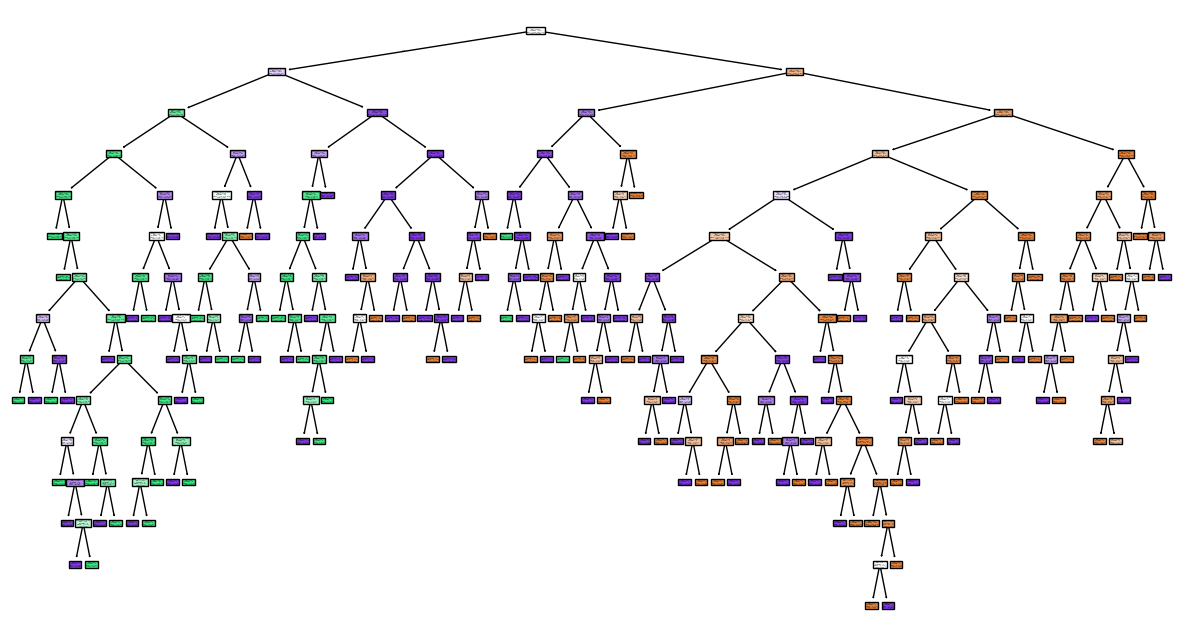

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Create the model
dt = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=None,          # limit depth if overfitting
    random_state=42
)

# 2. Train the model
dt.fit(X_train, y_train)

# 3. Predict
y_pred = dt.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Visualize the tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt, feature_names=X_train.columns, class_names=[str(cls) for cls in dt.classes_], filled=True)
plt.show()

Accuracy: 0.9615384615384616

Classification Report:
               precision    recall  f1-score   support

        High       0.96      0.98      0.97       567
         Low       0.97      0.96      0.96       276
      Medium       0.96      0.95      0.95       587

    accuracy                           0.96      1430
   macro avg       0.96      0.96      0.96      1430
weighted avg       0.96      0.96      0.96      1430


Confusion Matrix:
 [[554   0  13]
 [  0 264  12]
 [ 21   9 557]]


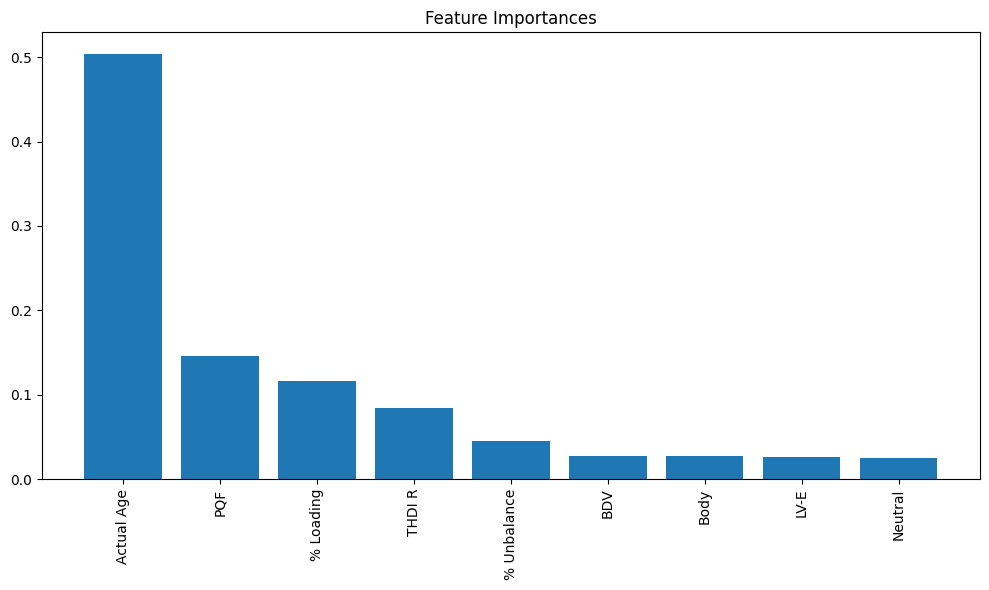

In [110]:
from sklearn.ensemble import RandomForestClassifier           #Applying random forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create the model
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    criterion='gini',      # or 'entropy'
    max_depth=None,        # limit depth if needed
    random_state=42
)

# 2. Train the model
rf.fit(X_train, y_train)

# 3. Predict
y_pred = rf.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Feature importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [111]:
from sklearn.neighbors import KNeighborsClassifier                        #Applying KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create the model
# n_neighbors is the number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # p=2 → Euclidean distance

# 2. Train the model
knn.fit(X_train, y_train)

# 3. Predict
y_pred = knn.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7748251748251749

Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.86      0.82       567
         Low       0.83      0.74      0.78       276
      Medium       0.74      0.71      0.72       587

    accuracy                           0.77      1430
   macro avg       0.78      0.77      0.77      1430
weighted avg       0.77      0.77      0.77      1430


Confusion Matrix:
 [[490   1  76]
 [  3 203  70]
 [130  42 415]]


In [112]:
from sklearn.model_selection import cross_val_score    #This code is finding the best k value for a K-Nearest Neighbors (KNN) #
                                                        #classifier using cross-validation.
import numpy as np                                            

k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)      #Runs 5-fold cross-validation
    accuracies.append(scores.mean())                             #Takes the average accuracy across folds and stores it for that k.



best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

Best K: 8


In [113]:
from sklearn.neighbors import KNeighborsClassifier                     #Applying KNN with best K value
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the final model with the best k
knn_best = KNeighborsClassifier(n_neighbors=8)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_best.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7818181818181819

Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.90      0.83       567
         Low       0.83      0.78      0.80       276
      Medium       0.77      0.67      0.72       587

    accuracy                           0.78      1430
   macro avg       0.79      0.78      0.78      1430
weighted avg       0.78      0.78      0.78      1430


Confusion Matrix:
 [[513   0  54]
 [  2 214  60]
 [151  45 391]]


In [114]:
from sklearn.svm import SVC                    #Applying SVM model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

# Step 2: Initialize the SVM classifier
svm = SVC()

# Step 3: Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 5: Train the final SVM model with the best params
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = best_svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.823076923076923

Classification Report:
               precision    recall  f1-score   support

        High       0.82      0.89      0.85       567
         Low       0.87      0.83      0.85       276
      Medium       0.80      0.76      0.78       587

    accuracy                           0.82      1430
   macro avg       0.83      0.82      0.83      1430
weighted avg       0.82      0.82      0.82      1430


Confusion Matrix:
 [[504   0  63]
 [  0 229  47]
 [110  33 444]]


In [115]:
from sklearn.naive_bayes import GaussianNB            #applying naive bayes model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the Naive Bayes model
nb = GaussianNB()

# Step 2: Train the model
nb.fit(X_train, y_train)

# Step 3: Predict
y_pred = nb.predict(X_test)

# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7909090909090909

Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.86      0.83       567
         Low       0.86      0.79      0.82       276
      Medium       0.76      0.72      0.74       587

    accuracy                           0.79      1430
   macro avg       0.80      0.79      0.80      1430
weighted avg       0.79      0.79      0.79      1430


Confusion Matrix:
 [[487   0  80]
 [  0 219  57]
 [126  36 425]]


In [116]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "DecisionTree", "Random Forest", "KNeighbors", "SVC", "GaussianNB"],
    "Accuracy": [0.80, 0.94, 0.96, 0.78, 0.82, 0.79],
    "F1-score": [0.82, 0.96, 0.97, 0.83, 0.85, 0.83]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  F1-score
0  Logistic Regression      0.80      0.82
1         DecisionTree      0.94      0.96
2        Random Forest      0.96      0.97
3           KNeighbors      0.78      0.83
4                  SVC      0.82      0.85
5           GaussianNB      0.79      0.83


       Feature  Importance
0   Actual Age    0.504190
4          PQF    0.145794
1    % Loading    0.116058
3       THDI R    0.084163
2  % Unbalance    0.044789
8          BDV    0.027281
5         Body    0.026808
7         LV-E    0.026001
6      Neutral    0.024916


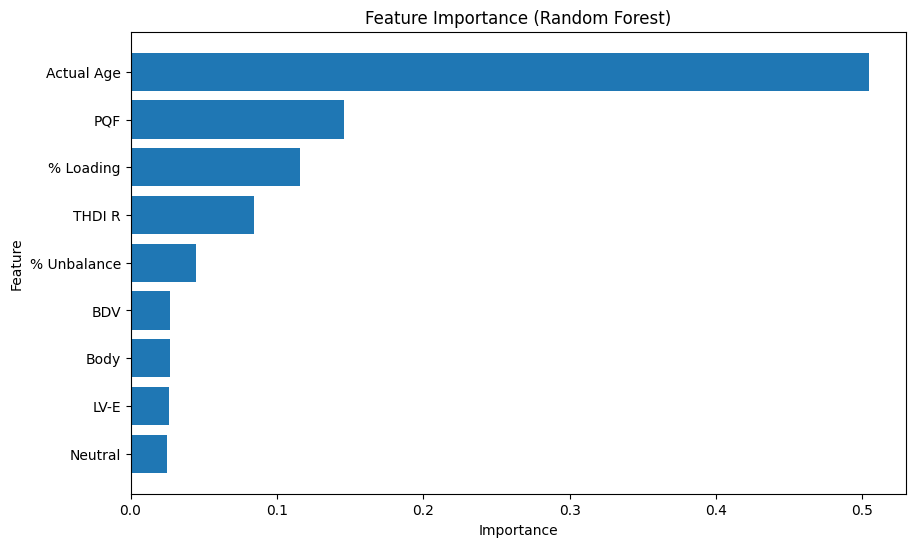

In [117]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # X_train, y_train from your train-test split

# Get feature importance
importances = rf.feature_importances_
feature_names = X_train.columns

# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show table
print(fi_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

C:\Users\PRATHAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


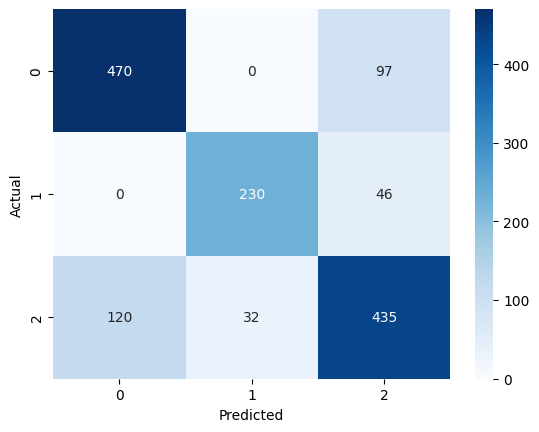

              precision    recall  f1-score   support

        High       0.80      0.83      0.81       567
         Low       0.88      0.83      0.86       276
      Medium       0.75      0.74      0.75       587

    accuracy                           0.79      1430
   macro avg       0.81      0.80      0.80      1430
weighted avg       0.79      0.79      0.79      1430



In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [119]:
from sklearn.model_selection import GridSearchCV            # Applying grid search for best parameters

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.9514242878560719


In [121]:
from sklearn.model_selection import GridSearchCV        #appying random forest after hypertuning
from sklearn.ensemble import RandomForestClassifier

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 10, 15],         # depth of each tree
    'min_samples_split': [2, 5, 10],        # min samples to split a node
    'min_samples_leaf': [1, 2, 4],          # min samples at a leaf node
    'max_features': ['sqrt', 'log2']        # features to consider per split
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # or 'f1_macro' for F1-score
    n_jobs=-1,           # use all processors
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import classification_report
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

        High       0.95      0.97      0.96       567
         Low       0.97      0.95      0.96       276
      Medium       0.94      0.94      0.94       587

    accuracy                           0.95      1430
   macro avg       0.95      0.95      0.95      1430
weighted avg       0.95      0.95      0.95      1430



In [120]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model with best parameters
rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9503496503496504

Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.97      0.96       567
         Low       0.97      0.95      0.96       276
      Medium       0.94      0.94      0.94       587

    accuracy                           0.95      1430
   macro avg       0.95      0.95      0.95      1430
weighted avg       0.95      0.95      0.95      1430



In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # for saving the model

# Final model with best params
final_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Train on full training set
final_rf.fit(X_train, y_train)

# Predictions
y_pred = final_rf.predict(X_test)

# Evaluation
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the final model
joblib.dump(final_rf, "final_random_forest_model.pkl")
print("✅ Model saved as final_random_forest_model.pkl")

Final Accuracy: 0.9503496503496504

Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.97      0.96       567
         Low       0.97      0.95      0.96       276
      Medium       0.94      0.94      0.94       587

    accuracy                           0.95      1430
   macro avg       0.95      0.95      0.95      1430
weighted avg       0.95      0.95      0.95      1430


Confusion Matrix:
 [[548   0  19]
 [  0 261  15]
 [ 29   8 550]]
✅ Model saved as final_random_forest_model.pkl
